In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys  
import os
import cv2
import time
from datetime import datetime
from PIL import Image, ImageOps
import matplotlib.patches as patches
# import torch

### custom made libraries
sys.path.append('../python_libraries/')
from camera import ueye
from arduino.arduino import *
from DMD_autoGUI.DMD_autoGUI import *

In [2]:
def load_image(file_path):
    return np.fliplr(np.flipud(np.array(Image.open(file_path))))

In [3]:
# save_folder = r"C:\Users\dacostafilho\Desktop\Measurements\p" + str(datetime.today().strftime('%Y%m%d')) + '\p' + str(datetime.today().strftime('%H%M%S')) 
save_folder = r"D:\measurements\measurements\p" + str(datetime.today().strftime('%Y%m%d'))
# -------------- init save folder --------------
if not os.path.exists(save_folder): # create save_folder folder if it does not exist
    os.makedirs(save_folder)

In [29]:
EXPOSURE_TIME_MS = 0.5#0.5# 0.3 #exposure time (ms); min: 0.035,  max: 199.849
FRAME_RATE = 12# frame per second (Hz); min: 1, max:28.986, suggested: 5 (or there are frame error, i.e. each second frames are not acquired)


# gain is set to 0 automatically
ueye.camera_off()
ueye.camera_off()

# width = 2500, height = 1400
ueye.camera_on(EXPOSURE_TIME_MS, FRAME_RATE)
nRet = ueye.activate_live_mode()


camera off

camera off
START

Camera model:		 UI327xCP-M
Camera serial no.:	 4103484749
Maximum image width:	 2056
Maximum image height:	 1542

  default setting for the exposure time     0.000 ms
  minimum exposure time                     0.024 ms
  maximum exposure time                    39.933 ms
  currently set exposure time              39.933 ms
  tried to changed exposure time to         0.504 ms
  currently set exposure time               0.504 ms
  frame rate set to                        12.000 fps
Press q to leave the programm


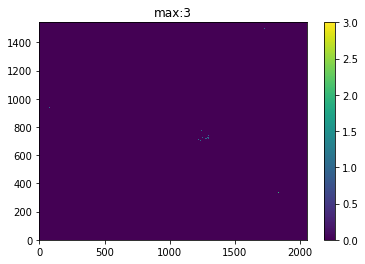

In [6]:
# nRet = ueye.activate_live_mode()
# reply=my_arduino.trigger_DMD_and_check_reply()
# time.sleep(0.1)
test_camera1 = ueye.take_frame(nRet)

# ueye.save_frame(save_folder,'630_borders20')
# test_camera1 = cv2.imread(save_folder + '/630_borders20.png',-1)
plt.pcolormesh(test_camera1)
plt.colorbar()
plt.title('max:' + str(np.max(test_camera1)))
plt.show() 

In [7]:
# ueye.camera_off()time.sjeep(0.1)

In [8]:
# my_arduino = Arduino(port='COM4', baudrate=115200) #Arduino_start_comm()
# reply=my_arduino.trigger_DMD_and_check_reply() #Arduino_trigger_DMD_and_reply(my_arduino)
# if reply==True:

#     print('yes')
# my_arduino.close_connection()

In [9]:
my_arduino = Arduino(port='COM10', baudrate=115200)


In [10]:
# my_arduino.close()

In [11]:
program_DMD_GUI = Program_DMD_GUI(
    folder_sequences =  r"D:\DMD\camera images to take\sequence/",
    sequence_temporary = "00_current_seq.txt",
    sequence_alignment_square = "00_alig_square.txt"
)

***mapping***

In [34]:
img = ueye.take_frame(nRet)

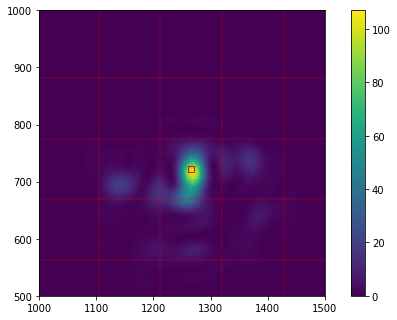

In [35]:
%matplotlib inline
map_base_folder = r'D:\measurements\measurements\p20210112/'
file = '/mapping/chess_board_cell_210.png'
# img = cv2.imread(map_base_folder + file, -1)
rect_size = 10

fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)

ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.pcolormesh(img)

top = 774#868
bottom = 670#764

left = 1212#736
right = 1320#844

plt.axvline(x=left, c='r', alpha=0.2)
plt.axvline(x=right, c='r', alpha=0.2)

plt.axhline(y=top, c='r', alpha=0.2)
plt.axhline(y=bottom, c='r', alpha=0.2)

centre_x = int((left+right)/2)
centre_y = int((bottom+top)/2)

size = int((-left+right))

plt.axvline(x=left-size, c='r', alpha=0.2)
plt.axvline(x=right+size, c='r', alpha=0.2)

plt.axhline(y=top+size, c='r', alpha=0.2)
plt.axhline(y=bottom-size, c='r', alpha=0.2)

plt.ylim(500,1000)
plt.xlim(1000,1500)
plt.colorbar()

rect = patches.Rectangle((centre_x-np.int(rect_size/2), centre_y-np.int(rect_size/2)),np.int(rect_size),np.int(rect_size),linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()


centre_x = centre_x #1401
centre_y = centre_y #868
half_size = int(size/2) #80
img_size = np.int(half_size/(210/10))

In [25]:
size*10/210

5.142857142857143

In [14]:
centre_x, centre_y, img_size

(1266, 722, 2)

***Acquisition***

In [15]:
sequences = [f'lines_rayleigh_10x10_{i}' for i in range(0, 62)]

In [16]:
# ## loop over sequence DMD frames
# program_DMD_GUI.click_on_icon('GUI_open')
# program_DMD_GUI.refresh_sequence()

# frame_idx = 30
# N_frames = 400#13230
# test_camera1 = [None]*N_frames

# names = range(800, 800+N_frames)
# max_val = np.zeros(N_frames)


save_folder = r'D:\measurements\measurements\p20210116\lines_rayleigh_10x10/'

# camera_imgs = np.zeros((N_frames, img_size, img_size))
file_n = 0*400
aoi_size = 40
time_start = time.time()

for seq_n in sequences:
    print(seq_n)
    if  seq_n == 'lines_rayleigh_10x10_61':
        N_frames = 296
#     elif  seq_n == 'logo_full_10x10_132':
#         N_frames = 120
    else:
        N_frames = 400
    print(N_frames, ' frames')
    program_DMD_GUI.start_sequence(seq_n+'.txt', sleep = 30)
    for i in range(N_frames):        
        reply=my_arduino.trigger_DMD_and_check_reply()
        time.sleep(0.111)
        if reply==True:
    #         ueye.save_frame(save_folder, 'img')        
    #         test_camera1[i] = load_image(save_folder + 'img.png') 
            test_camera1 = ueye.take_frame(nRet)
            time.sleep(0.1)
            aoi = test_camera1[centre_y-np.int(aoi_size/2):centre_y+np.int(aoi_size/2), centre_x-np.int(aoi_size/2):centre_x+np.int(aoi_size/2)]
            cv2.imwrite(save_folder + str(file_n)+'.bmp', aoi)
            file_n+=1

            if np.max(test_camera1 == 255):
                print('Warning')
            if i == 200:
                print(np.max(aoi))
                print('--------------')
#             fig = plt.gcf()
#             ax = fig.add_subplot(111)
#             ax.set_aspect('equal')
#             plt.pcolormesh(test_camera1)
#             rect = patches.Rectangle((centre_x-np.int(img_size/2), centre_y-np.int(img_size/2)),np.int(img_size),np.int(img_size),linewidth=1,edgecolor='r',facecolor='none')
#             ax.add_patch(rect)
#             plt.ylim(600,1000)
#             plt.xlim(600,1000)
#             plt.show()

#             max_val[i] = np.max(test_camera1)        
#         if reply==False:
#             print('Arduino, no reply : ',current_seq,' ',i)
#             continue
# np.savetxt(save_folder + '\\direct imaging\logo_full_with_context/max_vals.txt', max_val)  
print(time.time() - time_start)          
### park DMD mirrors
# click_on_icon(GUI_icons_folder, icon['stop'])
# time.sleep(1)
# click_on_icon(GUI_icons_folder, icon['stand_by'])
# time.sleep(1)
# Arduino_close_comm(my_arduino)

lines_rayleigh_10x10_0
400  frames
42
--------------
lines_rayleigh_10x10_1
400  frames
162
--------------
lines_rayleigh_10x10_2
400  frames
151
--------------
lines_rayleigh_10x10_3
400  frames
134
--------------
lines_rayleigh_10x10_4
400  frames
111
--------------
lines_rayleigh_10x10_5
400  frames
68
--------------
lines_rayleigh_10x10_6
400  frames
67
--------------
lines_rayleigh_10x10_7
400  frames
55
--------------
lines_rayleigh_10x10_8
400  frames
35
--------------
lines_rayleigh_10x10_9
400  frames
19
--------------
lines_rayleigh_10x10_10
400  frames
13
--------------
lines_rayleigh_10x10_11
400  frames
22
--------------
lines_rayleigh_10x10_12
400  frames
36
--------------
lines_rayleigh_10x10_13
400  frames
54
--------------
lines_rayleigh_10x10_14
400  frames
73
--------------
lines_rayleigh_10x10_15
400  frames
77
--------------
lines_rayleigh_10x10_16
400  frames
62
--------------
lines_rayleigh_10x10_17
400  frames
80
--------------
lines_rayleigh_10x10_18
400  frame

In [ ]:
(1.43/6)*13000/60

In [17]:
8338/3600

2.3161111111111112

In [ ]:
rect_size = aoi_size

# centre_x = 1265 #1401
# centre_y = 716 #868

for i in range(1):
    fig = plt.gcf()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    plt.pcolormesh(img)#[centre_y-np.int(aoi_size/2):centre_y+np.int(aoi_size/2), centre_x-np.int(aoi_size/2):centre_x+np.int(aoi_size/2)])
#     plt.pcolormesh(ueye.take_frame(nRet))
    plt.title(str(i))
    rect = patches.Rectangle((centre_x-np.int(rect_size/2), centre_y-np.int(rect_size/2)),np.int(rect_size),np.int(rect_size),linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

#     plt.ylim(600,900)
#     plt.xlim(1100,1400)
    plt.colorbar()
    plt.show()
    

In [ ]:
type(test_camera1)

In [ ]:
%timeit cv2.imread(save_folder + 'img.png',-1)

In [ ]:
type(test_camera1[0, 0])

In [ ]:

plt.pcolormesh(cv2.imread(img_folder + 'chess_board_cell_210.png', 0))
plt.colorbar()

In [ ]:
plt.plot(max_val, '.-')
plt.grid()
print(max_val.max())

In [ ]:
400*2+280

In [ ]:
120*9

In [ ]:
np.where(max_val == max_val.max())

In [ ]:
test_camera1 = cv2.imread(save_folder + '/'+ str(43)+'.png',-1)
plt.pcolormesh(test_camera1)
plt.colorbar()
plt.title(str(np.max(test_camera1)))
plt.show()
plt.plot(test_camera1[800, :])

In [ ]:
from pyueye import ueye as u

In [ ]:
width = 1280
height = 1080
rect_aoi = ueye.IS_RECT()
rect_aoi.s32X = ueye.int(0)
rect_aoi.s32Y = ueye.int(0)
rect_aoi.s32Width = ueye.int(width)
rect_aoi.s32Height = ueye.int(height)
ueye.is_AOI(hcam, ueye.IS_AOI_IMAGE_SET_AOI, rect_aoi, ueye.sizeof(rect_aoi))
print(f"AOI IS_AOI_IMAGE_SET_AOI returns {ret}")

In [ ]:
ueye.IS_RECT()

In [ ]:
u.int(4)